## After launching the python code that is present in the folders "../High_order_TS/" and in "../High_order_TS_with_scaffold", the different scripts return several Higher-Order indicators
- Below you can find a way on how to load and analyse the different measures

In [1]:
import h5py
import numpy as np
import sys
import matplotlib.pyplot as plt

### Loading the data and sort them according to time

In [3]:
data=np.loadtxt('../Sample_results/results_T0_1200_N50.txt')
data_sorted=data[np.argsort(data[:, 0])]

### Plotting the Hyper-Complexity for one realization of the CLM and different $\varepsilon$ values
- Here the multivariate Time Series has T=1200 time points and N=50 nodes

Text(0, 0.5, 'Hyper-Complexity')

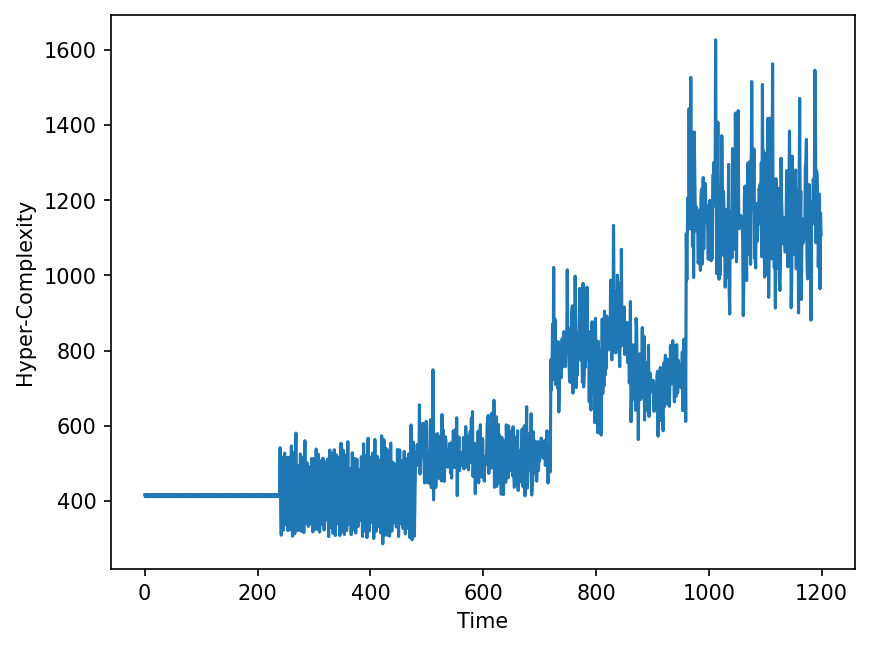

In [4]:
plt.figure(dpi=150)
##1 -> Hyper Complexity
##5 -> Hyper Coherence
plt.plot(data_sorted[:,0],data_sorted[:,1])
plt.xlabel("Time")
plt.ylabel("Hyper-Complexity")

### Reading the h5py file containing the edge projection of the list of violating triangles

In [7]:
Edge_file=h5py.File('../Sample_results/edges_projection_T0_1200_N50.hd5','r')
list(Edge_file.keys())

['0',
 '1',
 '10',
 '100',
 '1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '102',
 '1020',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '103',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1038',
 '1039',
 '104',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '105',
 '1050',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '106',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '107',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '108',
 '1080',
 '1081',
 '1082',
 '1083',
 '1084',
 '1085',
 '1086',
 '1087',
 '1088',
 '1089',
 '109',
 '1090',
 '1091',
 '1092',
 '1093',
 '1094',
 '1095',
 '1096',
 '1097',
 '1098',
 '1099',
 

In [6]:
### List of weighted edges at time t=0
### Column of the 2D array:
###[ node i, node j, Magnitude edge w_{ij}, # times edge (i,j) belongs to triangle (i,j,\bullet) ]
Edge_file['0'][:]


array([[16.      , 35.      , 32.84899 , 22.      ],
       [16.      , 41.      , 40.55162 , 22.      ],
       [35.      , 41.      , 31.393568, 22.      ],
       ...,
       [37.      , 45.      , 15.825464, 24.      ],
       [37.      , 49.      , 15.771277, 24.      ],
       [17.      , 40.      ,  9.668045, 21.      ]], dtype=float32)

In [6]:
Edge_file.close()

### Reading the scaffold at time point '0' and plotting it as a networkx Graph
### Dependencies to install:
- pickle
- networkx

In [8]:
sys.path.append('../High_order_TS_with_scaffold/') # add parent directory to import the module Holes
import Holes as ho
import pickle as pk
import networkx as nx

In [9]:
def load_scaffold_singletime(filepath_scaffold,single_time,ScafH=nx.Graph(),hom_group=1):
    f=open(filepath_scaffold+'generators__{0}.pck'.format(single_time), 'rb')
    
    gen = pk.load(f)

    edges = []
    for c in gen[hom_group]:
        for e in c.cycles():
            #print(e)
            u , v = int(e[0]) , int(e[1])
            if ScafH.has_edge(u,v):
                ScafH[u][v]['weight'] += c.persistence_interval()
            else:
                ScafH.add_edge(u, v, weight=c.persistence_interval())
    f.close()
    return(ScafH)


In [10]:
ScafH=load_scaffold_singletime('../Sample_results/trial_gen/',single_time='0',ScafH=nx.Graph(),hom_group=1)

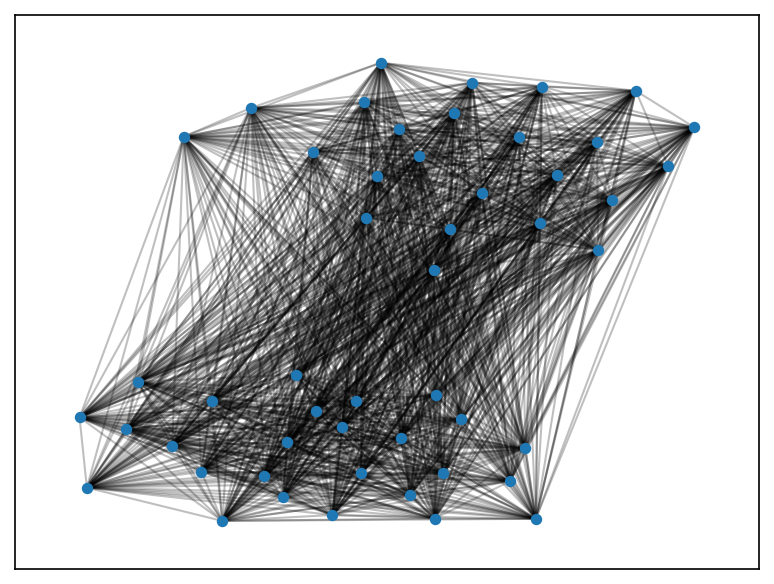

In [14]:
plt.figure(dpi=150)
layout = nx.drawing.layout.spring_layout(ScafH)
#nx.draw(ScafH, pos=layout, node_size=20,alpha=0.25)
nx.draw_networkx_edges(ScafH, pos=layout,alpha=0.25)
nx.draw_networkx_nodes(ScafH, pos=layout,node_size=20)
